# Financial Data Analysis (SQL + Python)

**Objective:**  
This project analyzes companies' financial performance using SQL for data preparation
and Python for exploratory and risk analysis.

**Technologies Used:**  
- SQL Server (Views & Data Preparation)  
- Python (Pandas, NumPy, Matplotlib, Seaborn)  
- JupyterLab

In [38]:
import pandas as pd
from sqlalchemy import create_engine

In [39]:
engine = create_engine(
    "mssql+pyodbc:///?odbc_connect="
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\\SQLEXPRESS;"
    "DATABASE=MyNewDatabase;"
    "Trusted_Connection=yes;"
)


## Exploratory Data Analysis (EDA)

Initial inspection of the dataset to understand structure and data quality.


In [42]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27298 entries, 0 to 27297
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Şirket_Adı             27298 non-null  object 
 1   Şirketin_Kodu          27298 non-null  object 
 2   Yıl                    27298 non-null  int64  
 3   Periyot                27298 non-null  object 
 4   Cari_Oran              27298 non-null  float64
 5   Asit_Test_Oranı        27298 non-null  float64
 6   Nakit_Oranı            27298 non-null  float64
 7   Aktif_Karlılık         27298 non-null  float64
 8   Özsermaye_Karlılığı    27298 non-null  float64
 9   Net_Kar_Marjı          27298 non-null  float64
 10  Brüt_Kar_Marjı         27298 non-null  float64
 11  Faaliyet_Kar_Marjı     27298 non-null  float64
 12  FAVÖK_Marjı            27298 non-null  float64
 13  Toplam_Borç_Özsermaye  27298 non-null  float64
 14  Borç_Kaynak_Oranı      27298 non-null  float64
 15  Fi

Şirket_Adı               0
Şirketin_Kodu            0
Yıl                      0
Periyot                  0
Cari_Oran                0
Asit_Test_Oranı          0
Nakit_Oranı              0
Aktif_Karlılık           0
Özsermaye_Karlılığı      0
Net_Kar_Marjı            0
Brüt_Kar_Marjı           0
Faaliyet_Kar_Marjı       0
FAVÖK_Marjı              0
Toplam_Borç_Özsermaye    0
Borç_Kaynak_Oranı        0
Finansal_Kaldıraç        0
Net_Borç_FAVÖK           0
Aktif_Devir_Hızı         0
Alacak_Devir_Hızı        0
Stok_Devir_Hızı          0
Altman_Z_Skoru           0
Springate_Skoru          0
Zmijewski_Skoru          0
L_Model_Skoru            0
Risk_Kateqori            0
dtype: int64

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yıl,27298.0,2.017335e+03,4.737580,2.008000e+03,2.013000e+03,2.018000e+03,2.021000e+03,2.024000e+03
Cari_Oran,27298.0,1.553150e+09,0.000000,1.553150e+09,1.553150e+09,1.553150e+09,1.553150e+09,1.553150e+09
Asit_Test_Oranı,27298.0,1.128897e+09,0.000680,1.128897e+09,1.128897e+09,1.128897e+09,1.128897e+09,1.128897e+09
Nakit_Oranı,27298.0,5.364072e+08,0.000130,5.364072e+08,5.364072e+08,5.364072e+08,5.364072e+08,5.364072e+08
Aktif_Karlılık,27298.0,1.032214e+09,0.000141,1.032214e+09,1.032214e+09,1.032214e+09,1.032214e+09,1.032214e+09
Özsermaye_Karlılığı,27298.0,1.141885e+09,0.000558,1.141885e+09,1.141885e+09,1.141885e+09,1.141885e+09,1.141885e+09
Net_Kar_Marjı,27298.0,1.094292e+09,0.000571,1.094292e+09,1.094292e+09,1.094292e+09,1.094292e+09,1.094292e+09
Brüt_Kar_Marjı,27298.0,2.516954e+09,0.000930,2.516954e+09,2.516954e+09,2.516954e+09,2.516954e+09,2.516954e+09
Faaliyet_Kar_Marjı,27298.0,1.730663e+09,0.000459,1.730663e+09,1.730663e+09,1.730663e+09,1.730663e+09,1.730663e+09
FAVÖK_Marjı,27298.0,1.730663e+09,0.000459,1.730663e+09,1.730663e+09,1.730663e+09,1.730663e+09,1.730663e+09


In [44]:
df.head(3)

,Şirket_Adı,Şirketin_Kodu,Yıl,Periyot,Cari_Oran,Asit_Test_Oranı,Nakit_Oranı,Aktif_Karlılık,Özsermaye_Karlılığı,Net_Kar_Marjı,...,Finansal_Kaldıraç,Net_Borç_FAVÖK,Aktif_Devir_Hızı,Alacak_Devir_Hızı,Stok_Devir_Hızı,Altman_Z_Skoru,Springate_Skoru,Zmijewski_Skoru,L_Model_Skoru,Risk_Kateqori
0,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,Yıllık,1.553150e+09,1.128897e+09,5.364072e+08,1.032214e+09,1.141885e+09,1.094292e+09,...,3.836204e+09,1.565947e+09,5.165940e+08,2.339714e+09,1.964643e+09,1.888644e+09,5.842145e+08,-1.395337e+09,-5.120790e+08,Sağlam
1,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,9 Aylık,1.553150e+09,1.128897e+09,5.364072e+08,1.032214e+09,1.141885e+09,1.094292e+09,...,3.836204e+09,1.565947e+09,5.165940e+08,2.339714e+09,1.964643e+09,1.888644e+09,5.842145e+08,-1.395337e+09,-5.120790e+08,Sağlam
2,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,6 Aylık,1.553150e+09,1.128897e+09,5.364072e+08,1.032214e+09,1.141885e+09,1.094292e+09,...,3.836204e+09,1.565947e+09,5.165940e+08,2.339714e+09,1.964643e+09,1.888644e+09,5.842145e+08,-1.395337e+09,-5.120790e+08,Sağlam


In [45]:
exclude_cols = ["Şirket_Adı","Şirketin_Kodu","Yıl","Periyot","Risk_Kateqori"]

for col in df.columns:
    if col not in exclude_cols:
        df[col] = df[col].astype(int)

In [46]:
df.head(3)

,Şirket_Adı,Şirketin_Kodu,Yıl,Periyot,Cari_Oran,Asit_Test_Oranı,Nakit_Oranı,Aktif_Karlılık,Özsermaye_Karlılığı,Net_Kar_Marjı,...,Finansal_Kaldıraç,Net_Borç_FAVÖK,Aktif_Devir_Hızı,Alacak_Devir_Hızı,Stok_Devir_Hızı,Altman_Z_Skoru,Springate_Skoru,Zmijewski_Skoru,L_Model_Skoru,Risk_Kateqori
0,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,Yıllık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
1,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,9 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
2,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,6 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam


In [47]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


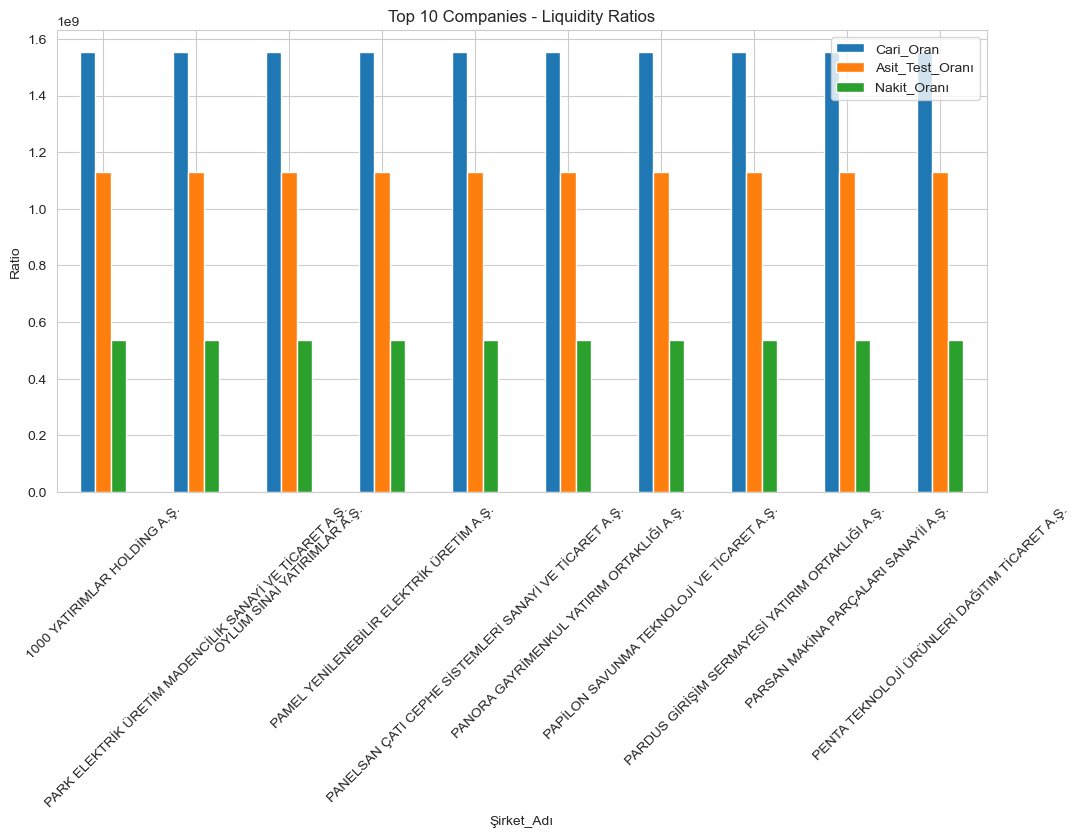

In [54]:
# Purpose: Compare liquidity ratios (Current, Acid-Test, Cash) across top 10 companies
# Insight: Shows which companies have stronger short-term financial health

top_companies.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Companies - Liquidity Ratios")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.show()


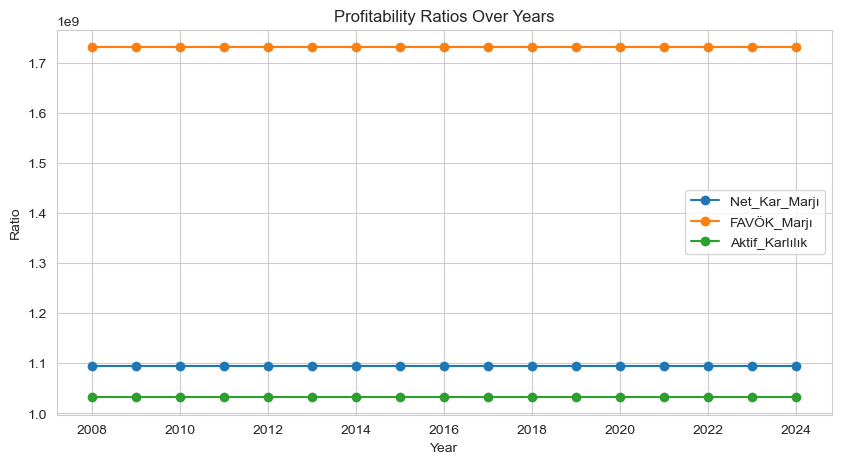

In [55]:
# Purpose: Display profitability trends (Net Margin, FAVÖK, ROA) over years
# Insight: Highlights whether company profitability is improving or declining over time

yearly_profit.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Profitability Ratios Over Years")
plt.ylabel("Ratio")
plt.xlabel("Year")
plt.grid(True)
plt.show()


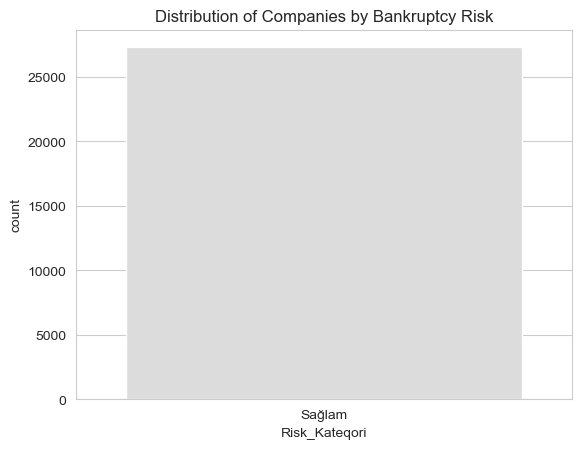

In [62]:
# Purpose: Show distribution of companies by bankruptcy risk level
# Insight: Visualizes how many companies are in high, medium, or low risk categories

sns.countplot(data=df, x='Risk_Kateqori', hue='Risk_Kateqori', palette='coolwarm')
plt.title("Distribution of Companies by Bankruptcy Risk")
plt.show()



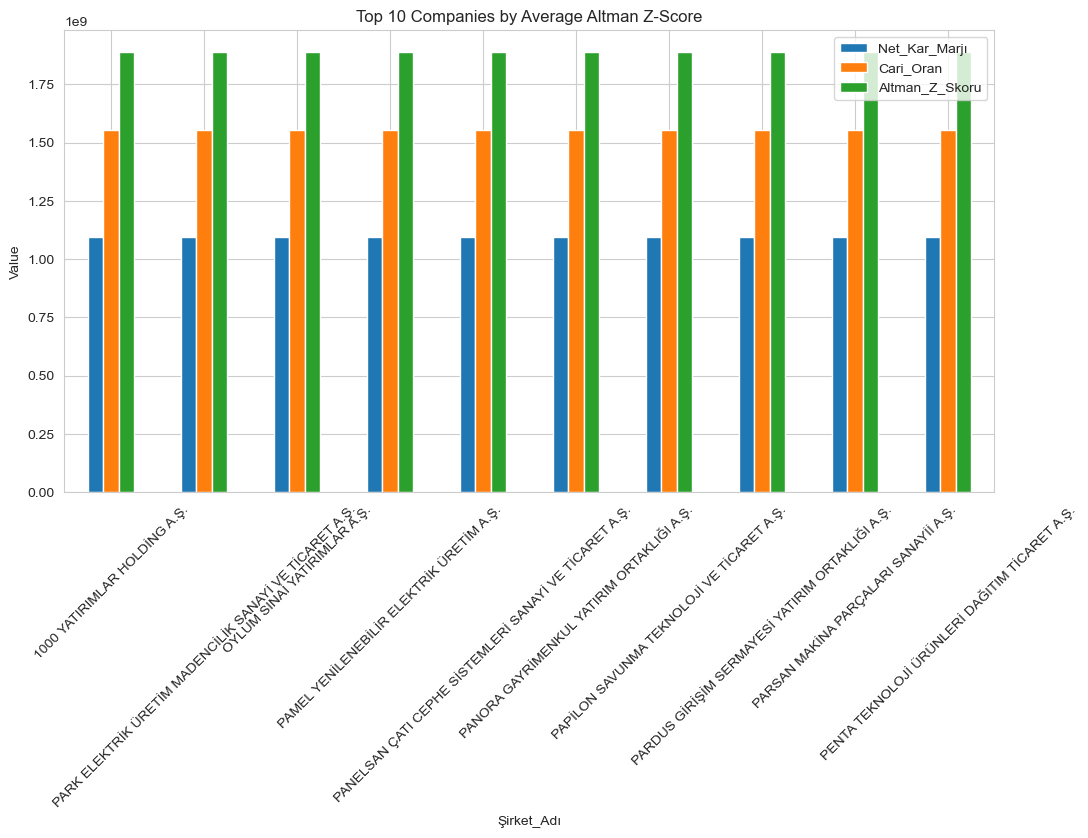

In [59]:
# Purpose: Compare average Altman Z, Net Margin, and Current Ratio across top 10 companies
# Insight: Highlights best performing companies in terms of financial stability

company_perf.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Companies by Average Altman Z-Score")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


In [81]:
df

,Şirket_Adı,Şirketin_Kodu,Yıl,Periyot,Cari_Oran,Asit_Test_Oranı,Nakit_Oranı,Aktif_Karlılık,Özsermaye_Karlılığı,Net_Kar_Marjı,...,Finansal_Kaldıraç,Net_Borç_FAVÖK,Aktif_Devir_Hızı,Alacak_Devir_Hızı,Stok_Devir_Hızı,Altman_Z_Skoru,Springate_Skoru,Zmijewski_Skoru,L_Model_Skoru,Risk_Kateqori
0,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,Yıllık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
1,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,9 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
2,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,6 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
3,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,6 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
4,A1 CAPİTAL YATIRIM MENKUL DEĞERLER A.Ş.,A1CAP,2020,3 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27293,ZİRAAT GAYRİMENKUL YATIRIM ORTAKLIĞI A.Ş.,ZRGYO,2023,3 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
27294,ZİRAAT GAYRİMENKUL YATIRIM ORTAKLIĞI A.Ş.,ZRGYO,2024,Yıllık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
27295,ZİRAAT GAYRİMENKUL YATIRIM ORTAKLIĞI A.Ş.,ZRGYO,2024,9 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
27296,ZİRAAT GAYRİMENKUL YATIRIM ORTAKLIĞI A.Ş.,ZRGYO,2024,6 Aylık,1553149619,1128896514,536407174,1032213641,1141884771,1094292296,...,3836204034,1565947213,516594022,2339713917,1964642988,1888643945,584214486,-1395336829,-512079024,Sağlam
